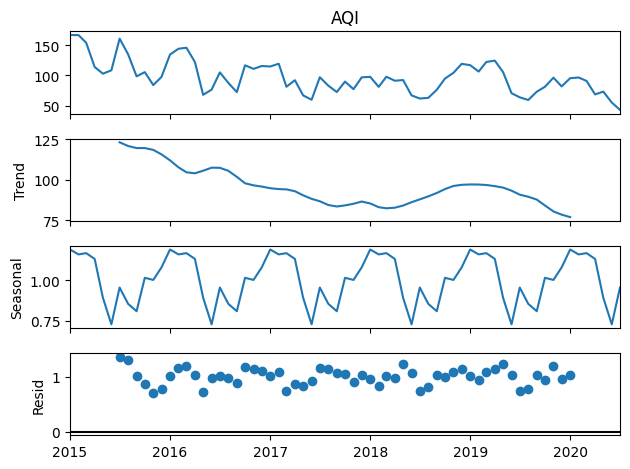

In [1]:
import pandas as pd
b = pd.read_csv('bengaluru.csv')
b['date'] = pd.to_datetime(b['date'])
b.set_index('date', inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
b_AQI = b['AQI']
result = seasonal_decompose(b_AQI, model='multiplicative')
result.plot();

In [2]:
!pip install pmdarima
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;
b_AQI = b['AQI']
auto_arima(y=b_AQI,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12)
train = b_AQI[:41] #from 2015-2018
test = b_AQI[42:54]# july 2018-june 2019

In [4]:
model=SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  AQI   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -183.053
Date:                              Mon, 29 Jan 2024   AIC                            374.107
Time:                                      14:45:35   BIC                            380.961
Sample:                                  01-01-2015   HQIC                           376.603
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9443      0.037     25.214      0.000       0.871       1.018
ar.S.L12       0.9980      0.186      5.353      0.000       0.633       1.363
ma.S.L12      -0.9361      2.944     -0.318      0.750      -6.705       4.833
sigma2       280.2629    748.602      0.374      0.708   -1186.969    1747.495
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.76   Prob(JB):                         1.00
Heteroskedasticity (H):               0.54   Skew:                             0.01
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'bengaluru Prediction data'}, xlabel='date'>

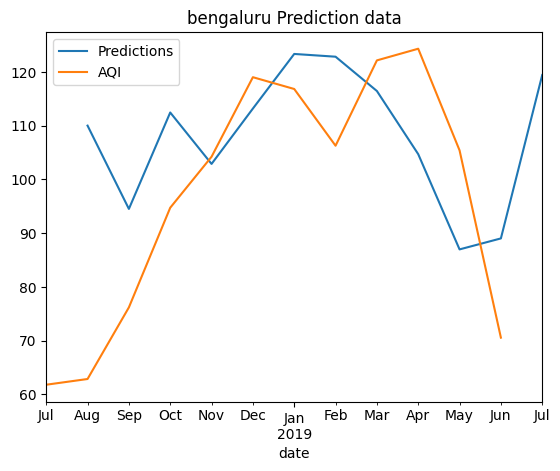

In [7]:
predictions = results.predict(start=43, end=54, typ='levels').rename('Predictions')
predictions.plot(legend=True)
test.plot(legend=True,title="bengaluru Prediction data")

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error,mean_poisson_deviance,mean_gamma_deviance
import math
import numpy as np
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('Root Mean Squared Error: ', RMSE)
print('Mean AQI:',test.mean())
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)
mse = mean_squared_error(test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
print('MAPE: '+str(mape))
r2score=r2_score(test, predictions)
print('r2score: '+str(r2score))
explainedVariance_score=explained_variance_score(test, predictions)
print('explainedVariance_score: '+str(explainedVariance_score))
me=max_error(test, predictions)
print('me: '+str(me))
mpd=mean_poisson_deviance(test, predictions)
print('mpd: '+str(mpd))
mgd=mean_gamma_deviance(test, predictions)
print('mgd: '+str(mgd))

Root Mean Squared Error:  27.842858899864297
Mean AQI: 97.00793010752687
Bias: -10.955056
MSE: 775.2247917177525
MAE: 22.81794741741663
RMSE: 27.842858899864297
MAPE: 0.19025655335509928
r2score: -0.5482799473159399
explainedVariance_score: -0.308589308646646
me: 48.869833452616035
mpd: 8.031960060371931
mgd: 0.08464194369219506


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


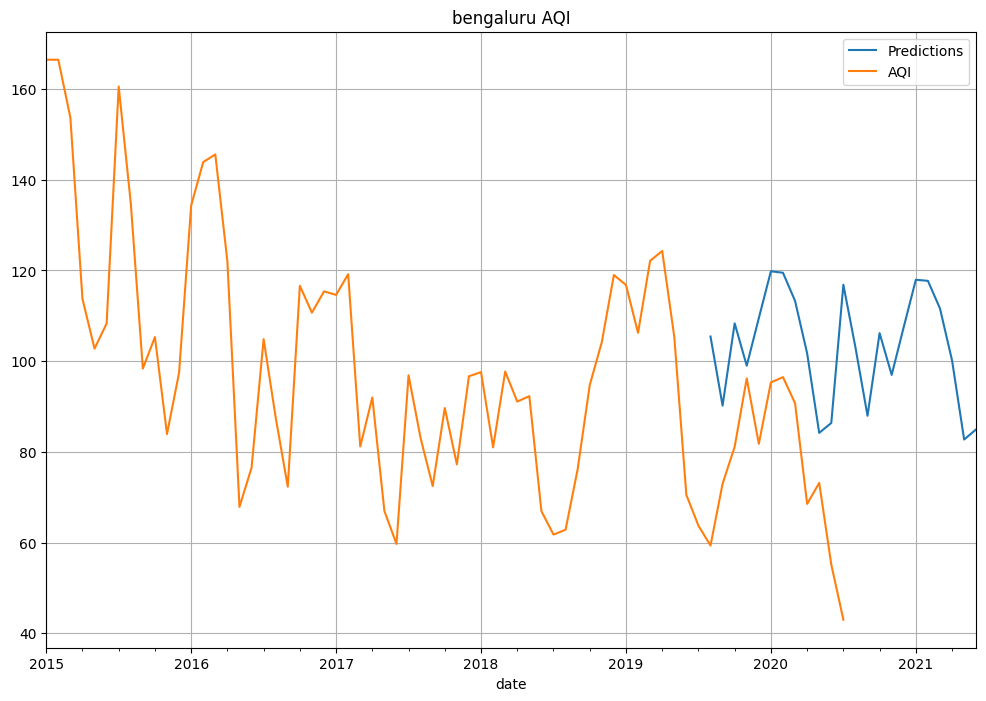

In [11]:
# Forming the model:
final_model = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,1,12))
results = final_model.fit()
#Obtaining predicted values:
predictions = results.predict(start=55, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
b_AQI.plot(legend=True,figsize=(12,8),grid=True,title="bengaluru AQI");